In [219]:
import os
import sys

# Define local pass #
#wd_path = '/home/hbkoziel/pyfesom/'

sys.path.append('../..') # add standard 's modules
sys.path.append('../modules')
#sys.path.append(wd_path)
#########################################

In [220]:
import pyfesom as pf
import matplotlib.pyplot as plt
from matplotlib import cm
#sys.path.append('/home/hbkoziel/pyfesom/pyfesom/cmocean/')
#import cmocean as cmap
#from mpl_toolkits.basemap import Basemap
import numpy as np
from netCDF4 import Dataset
import time
#import seaborn as sns

import xarray as xr
import pandas as pd

In [221]:
# Loading mesh for run

mesh_id    = 'meshArc4.5'
meshpath   = '/scratch/usr/hbkoziel/mesh/'+mesh_id+'/'            # Defining path where mesh is stored
mesh = pf.load_mesh(meshpath, usepickle=True, get3d=False)                                    # Loading mesh, stores it in mesh.****  
#mesh = pf.fesom_mesh(meshpath, get3d=True)
#mesh.zlevs = -mesh.zlevs                                            # Depth is made negative

first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
runid	= 'Arc12'

data_path  = '/scratch/usr/hbkoziel/'+runid+'/netcdf_monthly/'

/scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh
2
The usepickle == True)
The pickle file for python 2 exists.
The mesh will be loaded from /scratch/usr/hbkoziel/mesh/meshArc4.5/pickle_mesh


In [222]:
print('loading index...')
df = pd.read_csv(meshpath+'/bioregion_index_latlon.csv', delimiter=',',header=0)
print('LOADING DONE')
df.sort_values(by ='Unique_ID',inplace=True)
index = df["Unique_ID"]
index_unique = df.Unique_ID.unique().tolist()
index_unique.pop(-1)
print('SORTING...')
names = df.Name.unique().tolist()
names.pop(-1)
names[3]='Beaufort Sea - shelf'
names[4]='Amundsen-Viscount'
names.append('All Arctic Ocean (>66N)')
print('CLEANING DONE...')

loading index...
LOADING DONE
SORTING...
CLEANING DONE...


In [223]:
ncfile      = meshpath+'Arc4.5.initial.mesh.diag.nc'
f           = Dataset(ncfile, 'r')
NodalAreaModel = f.variables['cluster_area'][:]

In [224]:
colors = plt.get_cmap("tab10")

# pan-Arctic continental slope

In [225]:
ind_bio = np.load('index_slope.npy')

In [226]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1_sl = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_sl[tracer] = data_reg.data*30

df1_sl['time'] = dates
df1_sl.set_index('time', inplace= True)

In [227]:
df1_sl_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_sl_yearly[tracer] = data_reg.data*30

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_sl_yearly['time'] = dates
df1_sl_yearly.set_index('time', inplace= True)
df1_sl_yearly.to_pickle('VADV_sl')

In [228]:
tracer = 'HADVv2'
df3_sl = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_sl[tracer] = data_reg.data*30

df3_sl['time'] = dates
df3_sl.set_index('time', inplace= True)

In [229]:
df3_sl_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_sl_yearly[tracer] = data_reg.data*30

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_sl_yearly['time'] = dates
df3_sl_yearly.set_index('time', inplace= True)
df3_sl_yearly.to_pickle('HADV_sl')

In [230]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2_sl = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_sl[tracer] = data_reg.data*30

df2_sl['time'] = dates
df2_sl.set_index('time', inplace= True)
#df2.head()

In [231]:
df2_sl_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_sl_yearly[tracer] = data_reg.data*30

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_sl_yearly['time'] = dates
df2_sl_yearly.set_index('time', inplace= True)
df2_sl_yearly.to_pickle('VEDY_sl')

In [232]:
tracer = 'HEDYv2'
df4_sl = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4[tracer] = data_reg.data*30

df4_sl['time'] = dates
df4_sl.set_index('time', inplace= True)
#df2.head()

In [233]:
df4_sl_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_sl_yearly[tracer] = data_reg.data*30

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_sl_yearly['time'] = dates
df4_sl_yearly.set_index('time', inplace= True)
df4_sl_yearly.to_pickle('HEDY_sl')

# Eurasian basin

In [256]:
ind_bio = np.load('index_eurasian.npy')

In [257]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1_eu = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_eu[tracer] = data_reg.data*30

df1_eu['time'] = dates
df1_eu.set_index('time', inplace= True)

In [258]:
df1_eu_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_eu_yearly[tracer] = data_reg.data*30

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_eu_yearly['time'] = dates
df1_eu_yearly.set_index('time', inplace= True)
df1_eu_yearly.to_pickle('VADV_eu')

In [237]:
tracer = 'HADVv2'
df3_eu = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_eu[tracer] = data_reg.data*30

df3_eu['time'] = dates
df3_eu.set_index('time', inplace= True)

In [238]:
df3_eu_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_eu_yearly[tracer] = data_reg.data*30

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_eu_yearly['time'] = dates
df3_eu_yearly.set_index('time', inplace= True)
df3_eu_yearly.to_pickle('HADV_eu')

In [239]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2_eu = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_eu[tracer] = data_reg.data*30

df2_eu['time'] = dates
df2_eu.set_index('time', inplace= True)
#df2.head()

In [240]:
df2_eu_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_eu_yearly[tracer] = data_reg.data*30

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_eu_yearly['time'] = dates
df2_eu_yearly.set_index('time', inplace= True)
df2_eu_yearly.to_pickle('VEDY_eu')

In [241]:
tracer = 'HEDYv2'
df4_eu = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_eu[tracer] = data_reg.data*30

df4_eu['time'] = dates
df4_eu.set_index('time', inplace= True)
#df2.head()

In [242]:
df4_eu_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_eu_yearly[tracer] = data_reg.data*30

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_eu_yearly['time'] = dates
df4_eu_yearly.set_index('time', inplace= True)
df4_eu_yearly.to_pickle('HEDY_eu')

# Amerasian Basin

In [243]:
ind_bio = np.load('index_amerasian.npy')

In [244]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
tracer = 'VADVv2'
df1_am = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VADV'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_am[tracer] = data_reg.data *30

df1_am['time'] = dates
df1_am.set_index('time', inplace= True)

In [245]:
df1_am_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df1_am_yearly[tracer] = data_reg.data*30

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df1_am_yearly['time'] = dates
df1_am_yearly.set_index('time', inplace= True)
df1_am_yearly.to_pickle('VADV_am')

In [246]:
tracer = 'HADVv2'
df3_am = pd.DataFrame()
dates = pd.date_range('1985', freq="MS", periods= 12*len(np.arange(1985,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['ADVH'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_am[tracer] = data_reg.data*30

df3_am['time'] = dates
df3_am.set_index('time', inplace= True)

In [247]:
df3_am_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df3_am_yearly[tracer] = data_reg.data*30

dates = pd.date_range('1985', freq="1A", periods= len(np.arange(1985,2016,1)))
df3_am_yearly['time'] = dates
df3_am_yearly.set_index('time', inplace= True)
df3_am_yearly.to_pickle('HADV_am')

In [248]:
first_year = 2000
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)

tracer = 'VEDYv2'
df2_am = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['VEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_am[tracer] = data_reg.data*30

df2_am['time'] = dates
df2_am.set_index('time', inplace= True)
#df2.head()

In [249]:
df2_am_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df2_am_yearly[tracer] = data_reg.data*30

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df2_am_yearly['time'] = dates
df2_am_yearly.set_index('time', inplace= True)
df2_am_yearly.to_pickle('VEDY_am')

In [250]:
tracer = 'HEDYv2'
df4_am = pd.DataFrame()
dates = pd.date_range('2000', freq="MS", periods= 12*len(np.arange(2000,2016,1)))
data = xr.open_mfdataset(data_path+tracer+'.*.nc', concat_dim='time')
data['time'] = dates
    
data_sel = data['HEDY'].sel(time=slice(str(first_year)+'-01-01', str(last_year)+'-12-31'))
data_sel = data_sel.compute()
data_reg = np.sum(data_sel[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_am[tracer] = data_reg.data*30

df4_am['time'] = dates
df4_am.set_index('time', inplace= True)
#df2.head()

In [251]:
df4_am_yearly = pd.DataFrame()
yearly_data = data_sel.resample(time='1A').mean(dim='time')
data_reg = np.sum(yearly_data[:,ind_bio]*NodalAreaModel[ind_bio],axis=1)/np.sum(NodalAreaModel[ind_bio])
df4_am_yearly[tracer] = data_reg.data*30

dates = pd.date_range('2000', freq="1A", periods= len(np.arange(2000,2016,1)))
df4_am_yearly['time'] = dates
df4_am_yearly.set_index('time', inplace= True)
df4_am_yearly.to_pickle('HEDY_am')

# Visualization

In [259]:
df1_sl_yearly = pd.read_pickle('VADV_sl')
df2_sl_yearly = pd.read_pickle('VEDY_sl')
df3_sl_yearly = pd.read_pickle('HADV_sl')

df1_eu_yearly = pd.read_pickle('VADV_eu')
df2_eu_yearly = pd.read_pickle('VEDY_eu')
df3_eu_yearly = pd.read_pickle('HADV_eu')

df1_am_yearly = pd.read_pickle('VADV_am')
df2_am_yearly = pd.read_pickle('VEDY_am')
df3_am_yearly = pd.read_pickle('HADV_am')

Text(0.5,0,'time [years]')

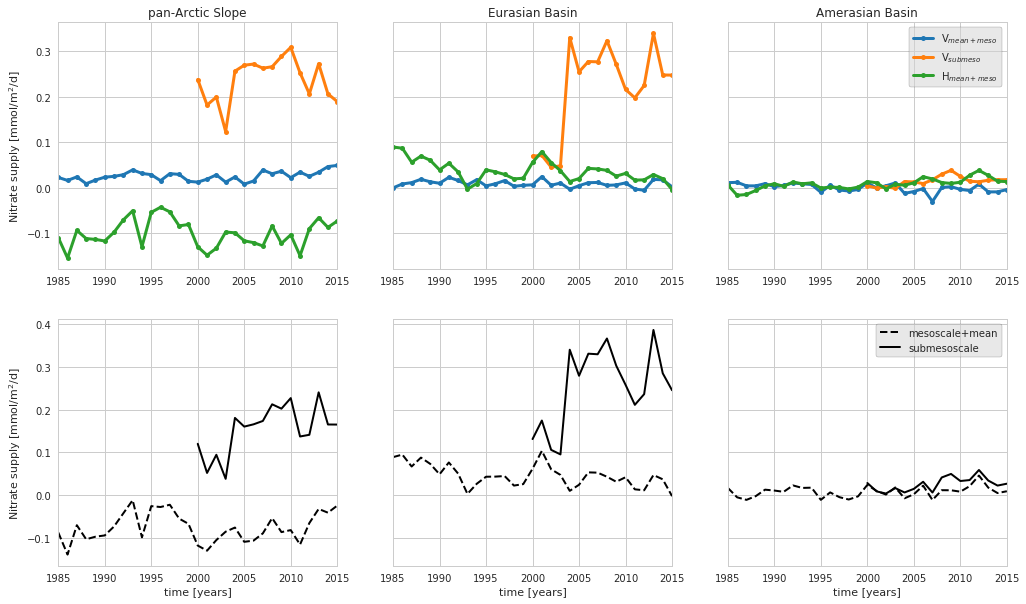

In [260]:
first_year = 1985
last_year  = 2015
years      = np.arange(first_year,last_year+1,1)
figsize=(17, 10)

rows,cols = 2,3
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(rows, cols, figsize=figsize, constrained_layout=False, sharex=False, sharey='row')#sharey='row'

# fig = plt.figure(figsize=(17, 10), facecolor='w', edgecolor='k', sharex = True, sharey=True)
# axs = fig.subplots(rows,cols,sharey=False,sharex=True)

plt.style.use('seaborn-whitegrid')

df1_sl_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='V$_{mean+meso}$',color=colors(0))
df2_sl_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='V$_{submeso}$',color=colors(1))
df3_sl_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = False, label='H$_{mean+meso}$',color=colors(2))
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax1.set_title('pan-Arctic Slope')
ax1.set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
ax1.xaxis.label.set_visible(False)

ax4.plot(years,df1_sl_yearly['VADVv2']+df3_sl_yearly['HADVv2'],'--k',lw=2,label='mesoscale+mean')
ax4.plot(years,df3_sl_yearly['HADVv2']+df2_sl_yearly['VEDYv2']+df1_sl_yearly['VADVv2'],'k',lw=2,label='submesoscale')
ax4.set_xlim(1985,2015)
ax4.set_ylabel('Nitrate supply [mmol/m$^{2}$/d]')
ax4.set_xlabel('time [years]')

df1_eu_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='V$_{mean+meso}$',color=colors(0))
df2_eu_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='V$_{submeso}$',color=colors(1))
df3_eu_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = False, label='H$_{mean+meso}$',color=colors(2))
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax2.set_title('Eurasian Basin')
ax2.xaxis.label.set_visible(False)

ax5.plot(years,df1_eu_yearly['VADVv2']+df3_eu_yearly['HADVv2'],'--k',lw=2,label='mesoscale+mean')
ax5.plot(years,df3_eu_yearly['HADVv2']+df2_eu_yearly['VEDYv2']+df1_eu_yearly['VADVv2'],'k',lw=2,label='submesoscale')
ax5.set_xlim(1985,2015)
ax5.set_xlabel('time [years]')

df1_am_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = True, label='V$_{mean+meso}$',color=colors(0))
df2_am_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = True, label='V$_{submeso}$',color=colors(1))
df3_am_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax3, legend = True, label='H$_{mean+meso}$',color=colors(2))
#df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
ax3.set_title('Amerasian Basin')
ax3.legend(frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)
ax3.xaxis.label.set_visible(False)

ax6.plot(years, df1_am_yearly['VADVv2']+df3_am_yearly['HADVv2'],'--k',lw=2,label='mesoscale+mean')
ax6.plot(years, df3_am_yearly['HADVv2']+df2_am_yearly['VEDYv2']+df1_am_yearly['VADVv2'],'k',lw=2,label='submesoscale')
ax6.legend(frameon=True,facecolor= 'lightgray',edgecolor='k',framealpha=.5)
ax6.set_xlim(1985,2015)
ax6.set_xlabel('time [years]')

#plt.savefig(save_path+'FIG9.png', dpi = 300, bbox_inches='tight') 

In [254]:
# fig = plt.figure(figsize=(10, 17), facecolor='w', edgecolor='k')
# plt.style.use('seaborn')

# first_year = 1985
# last_year  = 2015
# years      = np.arange(first_year,last_year+1,1)

# ax1      = fig.add_subplot(311)
# df1['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# df2['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# df3['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# #df4['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# plt.title('Eurasian basin')
# ax1.set_ylim(-0.015,0.025)

# ax2      = fig.add_subplot(312)
# df1_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# df2_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# df3_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# #df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# ax2.set_ylim(-0.006,0.011)

# ax3      = fig.add_subplot(313)
# plt.plot(years,df1_yearly['VADVv2']+df3_yearly['HADVv2'],'--k',lw=2)
# plt.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)

In [255]:
# first_year = 1985
# last_year  = 2015
# years      = np.arange(first_year,last_year+1,1)


# fig = plt.figure(figsize=(10, 17), facecolor='w', edgecolor='k')
# plt.style.use('seaborn')

# ax1      = fig.add_subplot(311)
# df1['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# df2['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# df3['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# #df4['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax1, legend = True)
# plt.title('Amerasian basin')
# ax1.set_ylim(-0.015,0.025)

# ax2      = fig.add_subplot(312)
# df1_yearly['VADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# df2_yearly['VEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# df3_yearly['HADVv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# #df4_yearly['HEDYv2'].plot(kind = 'line',style='.-',markersize = 10, lw = 3, ax = ax2, legend = True)
# ax2.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)
# ax2.set_ylim(-0.006,0.011)

# ax3      = fig.add_subplot(313)
# plt.plot(years,df1_yearly['VADVv2']+df3_yearly['HADVv2'],'--k',lw=2)
# plt.plot(years,df4_yearly['HEDYv2']+df3_yearly['HADVv2']+df2_yearly['VEDYv2']+df1_yearly['VADVv2'],'k',lw=2)